In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path="C:/Users/VenkatBhaskar/Downloads/datasets/telco_churn.csv"
df=pd.read_csv(path)

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.iloc[0]

customerID                7590-VHVEG
gender                        Female
SeniorCitizen                      0
Partner                          Yes
Dependents                        No
tenure                             1
PhoneService                      No
MultipleLines       No phone service
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 29.85
TotalCharges                   29.85
Churn                             No
Name: 0, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df2=df[df['Churn']=='Yes']
a=df['Churn'].count()
b=df2['Churn'].count()
c=(b/a)*100
print("%d percent of churn=True in dataset "%(c))

26 percent of churn=True in dataset 


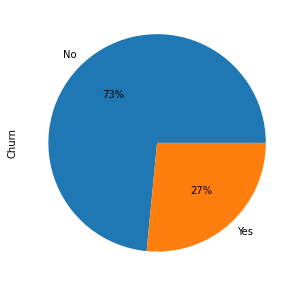

In [8]:
plot=df.Churn.value_counts().plot.pie(y='Churn',figsize=(5,5),autopct='%1.0f%%')

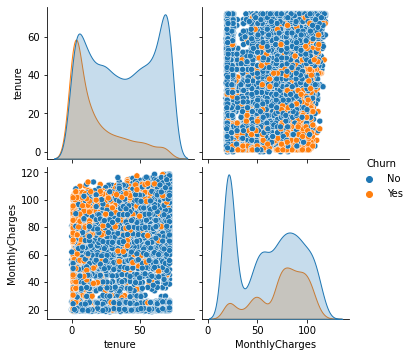

In [9]:
sns.pairplot(df[['Churn','tenure','MonthlyCharges']],hue="Churn")

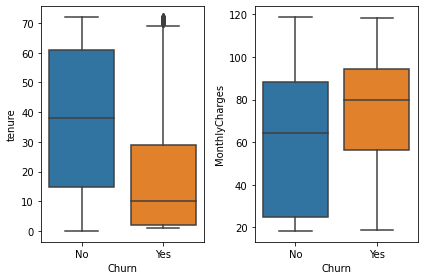

In [10]:
fig,axs=plt.subplots(ncols=2)
sns.boxplot(x='Churn',y='tenure',data=df,ax=axs[0])
sns.boxplot(x='Churn',y='MonthlyCharges',data=df,ax=axs[1])
plt.tight_layout()

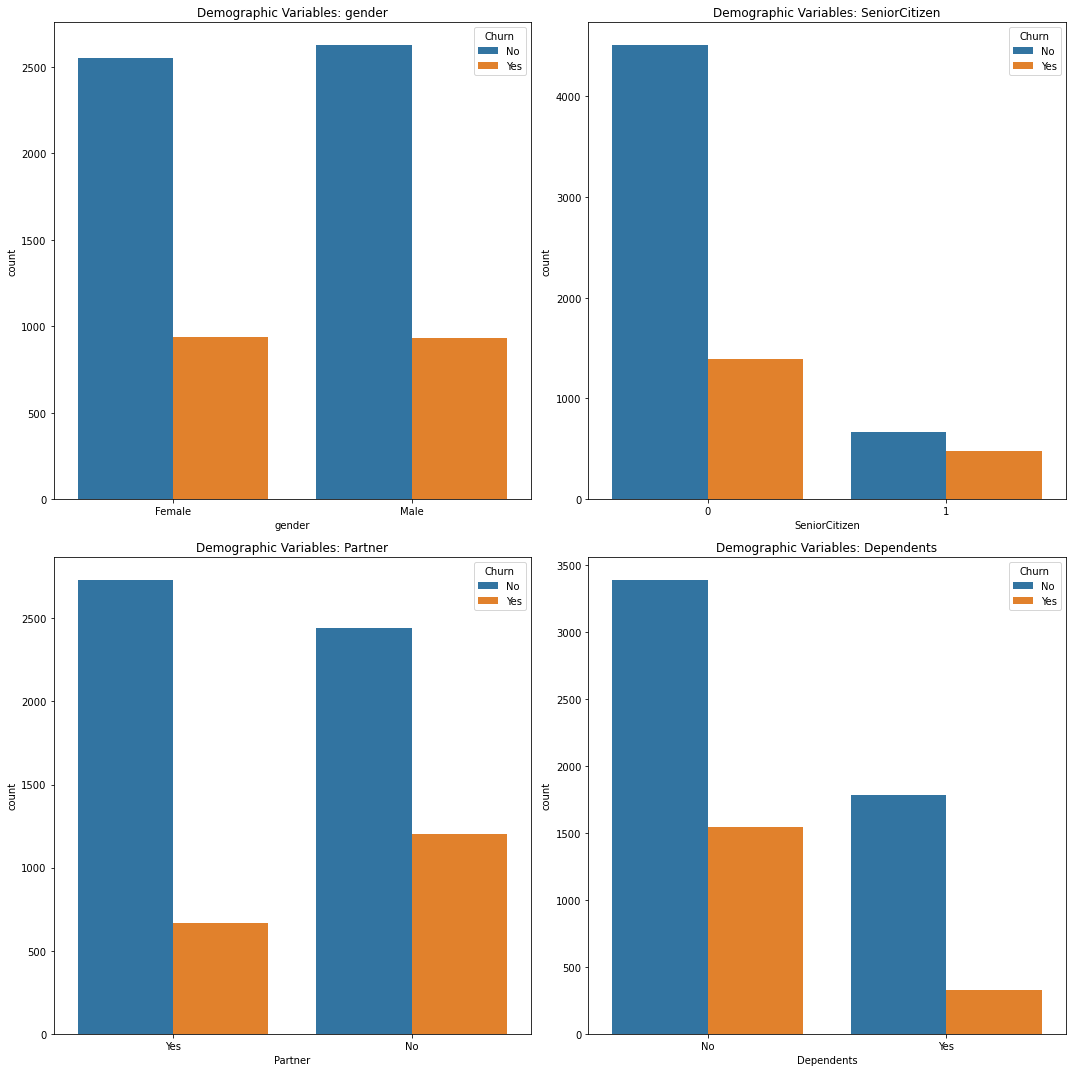

In [11]:
def plot_categoricals(columns,title):
    fig,axs=plt.subplots(ncols=2,nrows=int(len(columns)/2)+len(columns)%2)
    fig.set_size_inches(15,15)
    row=col=0
    for column in columns:
        plot_title='{}: {}'.format(title,column)
        sns.countplot(x=column,hue='Churn',data=df,ax=axs[row][col]).set_title(plot_title)
        if col==1:
            col=0
            row+=1
        else:
            col+=1
    plt.tight_layout()
plot_categoricals(['gender','SeniorCitizen','Partner','Dependents'],'Demographic Variables')

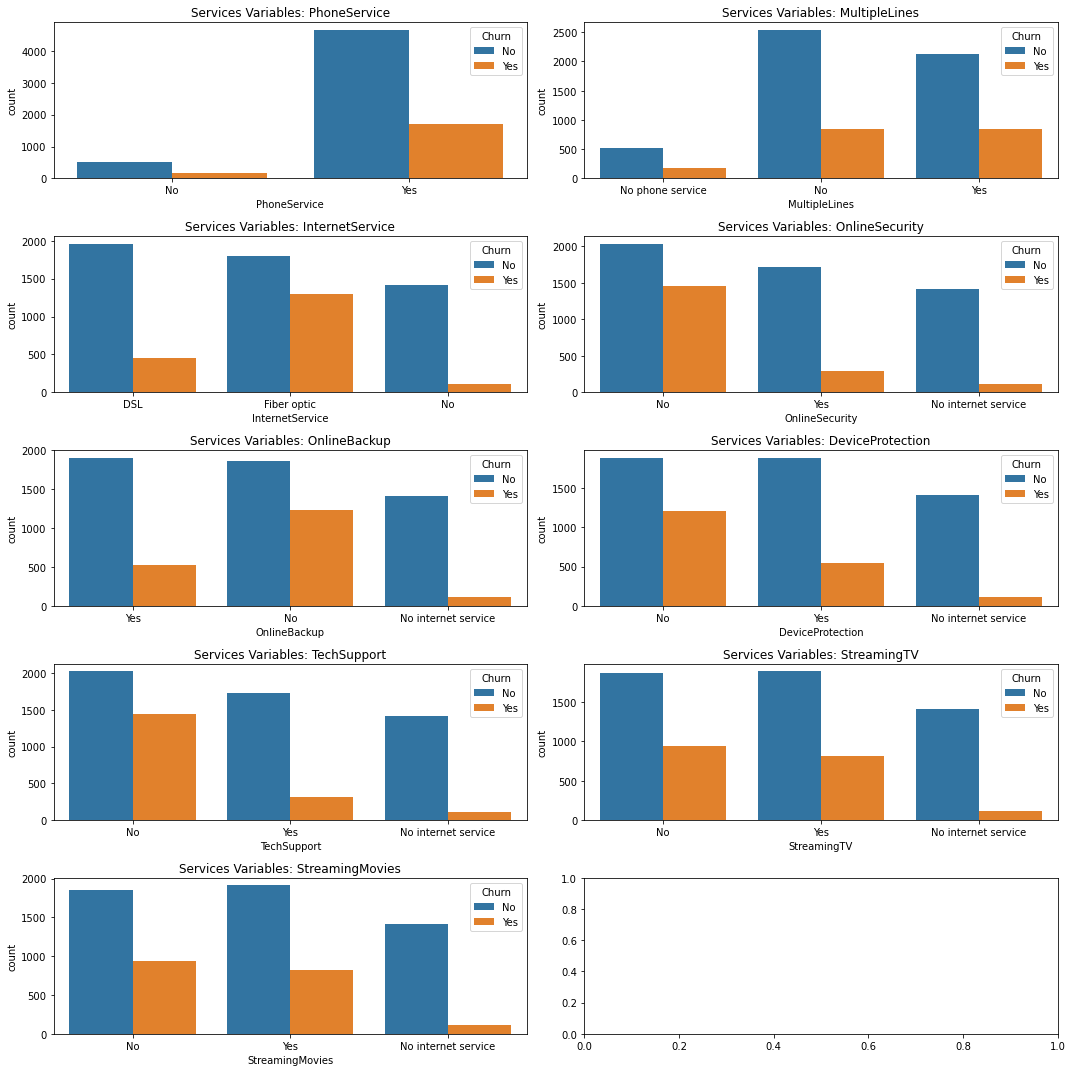

In [12]:
plot_categoricals(['PhoneService', 'MultipleLines', 'InternetService',
'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
'TechSupport', 'StreamingTV','StreamingMovies'],
'Services Variables')

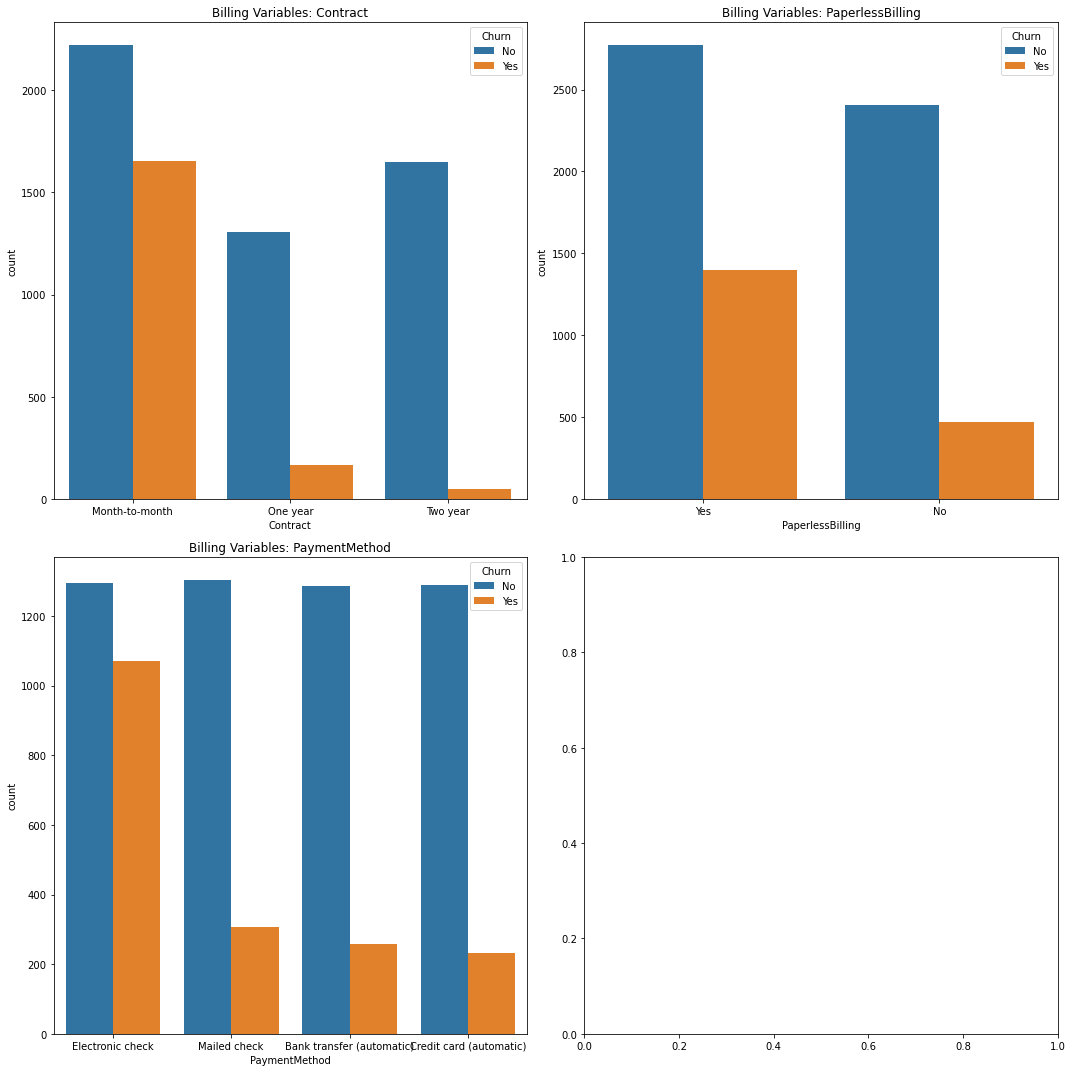

In [13]:
plot_categoricals(['Contract', 'PaperlessBilling', 'PaymentMethod'],
'Billing Variables')

In [14]:
#There are null values in the data
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
df['TotalCharges']=df['TotalCharges'].apply(lambda x: 0 if x==' ' else x)

In [16]:
categorical_cols=[col for col in df.columns if col not in ['customerId','MonthlyCharges','TotalCharges','tenture','Churn']]

In [17]:
#OneHotEncoding
def onehot_columns(df,categorical_cols):
    dummy_columns=pd.get_dummies(df[categorical_cols],prefix=categorical_cols)
    return pd.concat([df.drop(columns=categorical_cols),dummy_columns],axis=1)
for col in categorical_cols:
    df=onehot_columns(df,col)
df.columns

Index(['MonthlyCharges', 'TotalCharges', 'Churn', 'customerID_0002-ORFBO',
       'customerID_0003-MKNFE', 'customerID_0004-TLHLJ',
       'customerID_0011-IGKFF', 'customerID_0013-EXCHZ',
       'customerID_0013-MHZWF', 'customerID_0013-SMEOE',
       ...
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object', length=7162)

In [18]:
y=df['Churn'].apply(lambda x:0 if x=='No' else 1)
x=df.drop(columns="Churn")

In [19]:
x

,MonthlyCharges,TotalCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,29.85,29.85,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,56.95,1889.50,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,53.85,108.15,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,42.30,1840.75,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,70.70,151.65,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.50,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
7039,103.20,7362.90,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
7040,29.60,346.45,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
7041,74.40,306.60,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,
test_size=0.2,
random_state=1)

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
X_train.isnull().sum()

MonthlyCharges                             0
TotalCharges                               8
customerID_0002-ORFBO                      0
customerID_0003-MKNFE                      0
customerID_0004-TLHLJ                      0
                                          ..
PaperlessBilling_Yes                       0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
Length: 7161, dtype: int64

In [23]:
#FeatureSelection
feature_selector=SelectKBest(chi2,k='all')
feature_selector.fit(X_train,y_train)
p_values=feature_selector.pvalues_

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
X_train.info()